In [1]:
import numpy as np
import torch
import random
import copy
import matplotlib.pyplot as plt

In [2]:
from load_data import *

In [3]:
X_tr, X_te, y_tr, y_te, xs_tr, xs_te = load_german_data(svm=True,random_state=42,intercept=True)

In [4]:
print(sum(y_te==1)/len(y_te)*100)

69.33333333333334


In [5]:
def shuffle_array(arr_list, sample_ratio = 0.9, rs = 3):
    n_sam = int(len(arr_list[0])*sample_ratio)
    random.seed(rs)
    r_idxs = list(range(len(arr_list[0])))
    random.shuffle(r_idxs)
    arr_t = []
    for arr in arr_list:
        arr_t.append(copy.deepcopy(arr)[r_idxs][:n_sam])
    return tuple(arr_t)

In [6]:
xx,yy,zz = shuffle_array([X_tr,y_tr,xs_tr])

In [7]:
print(xx.shape, X_tr.shape)

(630, 24) (700, 24)


In [8]:
def poison_Z(xs,pos_rt = 0.1, rs = 3):
    n_pos = int(len(xs)*pos_rt)
    random.seed(rs)
    r_idxs = list(range(len(xs)))
    random.shuffle(r_idxs)
    xsp = copy.deepcopy(xs)
    xsp[r_idxs[:n_pos]] = 1-xs_tr[r_idxs[:n_pos]]
    return xsp

In [9]:
from fairLR_train import *

In [10]:
xs_tep =  poison_Z(xs_te,pos_rt = 0.1, rs = 3)

In [11]:
train_flr(data = 'german',save_dir = '../results', filename = 'german_FLR_model')

load data: german
train FLR model
None
save model
saved in  ../results/german_FLR_model.sm
save testdata
saved in  ../results/german_testset.te
saved in  ../results/german_testX.te


In [12]:
from fairLR_test import *
from save_utils import load_flr, load_nparray,save_prediction

In [13]:
from fair_eval import *

In [14]:
coef = load_flr( '../results/german_FLR_model.sm')
pred = predict_FairLR(X_te,coef)

In [15]:
def test_FLR(X_te, y_te,xs_te,load_path = '../results/german_FLR_model.sm'):
    coef = load_flr(load_path)
    pred = predict_FairLR(X_te,coef)
    calculate_overall_accuracy(pred,y_te)
    calculate_prule_clf(pred,y_te,xs_te)
    calculate_odds_clf(pred,y_te,xs_te)

In [16]:
def test_FLR_avg_diff(X_te, y_te,xs_te,load_path = '../results/german_FLR_model.sm'):
    coef = load_flr(load_path)
    pred = predict_FairLR(X_te,coef)
    pred = pred.flatten()
    y_te = y_te.flatten()
    xs_te = xs_te.flatten()
    res = {}
    res['accuary'] = calculate_overall_accuracy(pred,y_te,True)
    res['dispImp'] = diff_calculate_impact(pred,y_te,xs_te)
    res['dsipMisclf'] = diff_calculate_misclassification(pred,y_te,xs_te)
    res['dispFPR'] = diff_calculate_mistreatment(pred,y_te,xs_te,cond=-1)
    res['dispFNR'] = diff_calculate_mistreatment(pred,y_te,xs_te,cond=1)
    res['odds'] = diff_calculate_odds_clf(pred,y_te,xs_te,return_val = True)
    return res

In [17]:
def test_FLR_avg(X_te, y_te,xs_te,load_path = '../results/german_FLR_model.sm'):
    coef = load_flr(load_path)
    pred = predict_FairLR(X_te,coef)
    pred = pred.flatten()
    y_te = y_te.flatten()
    xs_te = xs_te.flatten()
    res = {}
    res['accuary'] = calculate_overall_accuracy(pred,y_te,True)
    res['dispImp'] = calculate_impact(pred,y_te,xs_te)
    res['dsipMisclf'] = calculate_misclassification(pred,y_te,xs_te)
    res['dispFPR'] = calculate_mistreatment(pred,y_te,xs_te,cond=-1)
    res['dispFNR'] = calculate_mistreatment(pred,y_te,xs_te,cond=1)
    res['odds'] = calculate_odds_clf(pred,y_te,xs_te,return_val = True)
    return res

In [18]:
def add_res(res,res_sum):
    for ikey in res:
        if ikey == 'odds':
            for jkey in res[ikey]:
                res_sum[ikey][jkey] +=  res[ikey][jkey]
        else:
            res_sum[ikey] += res[ikey]
    return res_sum
def divide_res(res_sum, rep = 5):
    for ikey in res_sum:
        if ikey =='odds':
            for jkey in res_sum[ikey]:
                    res_sum[ikey][jkey] /=  rep
        else:
            res_sum[ikey] /= rep
    return res_sum
def print_res(res):
    for ikey in res:
        print(ikey,": ",res[ikey])

300
poisoned ratio:  0.0


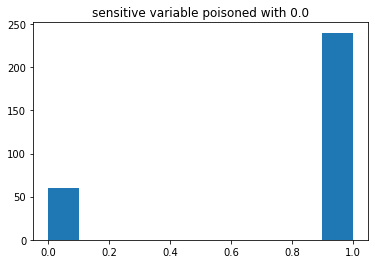

accuary :  78.0
dispImp :  5.833333333333335
dsipMisclf :  14.16666666666666
dispFPR :  25.29137529137529
dispFNR :  3.8877620013522654
odds :  {-1: 25.29137529137529, 1: 3.887762001352269}
poisoned ratio:  0.01


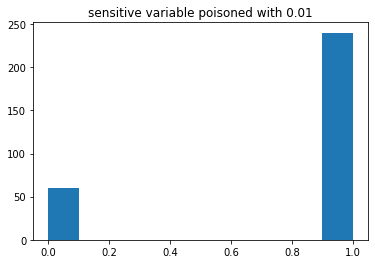

accuary :  78.0
dispImp :  5.062533045581542
dsipMisclf :  13.855858654076396
dispFPR :  24.189002926316356
dispFNR :  3.159973872690581
odds :  {-1: 24.189002926316356, 1: 3.1599738726905793}
poisoned ratio:  0.05


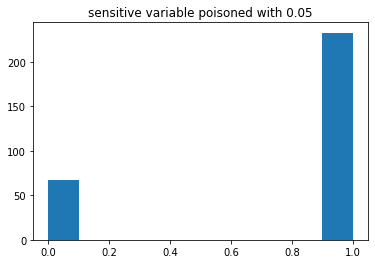

accuary :  78.0
dispImp :  4.47899002683273
dsipMisclf :  12.364849279016525
dispFPR :  22.360490682688955
dispFNR :  3.1208057731761345
odds :  {-1: 22.360490682688955, 1: 3.1208057731761327}
poisoned ratio:  0.1


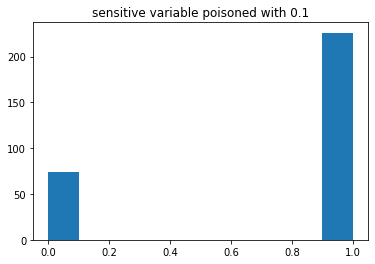

accuary :  78.0
dispImp :  4.137234524575421
dsipMisclf :  10.237804245805346
dispFPR :  19.735609784329288
dispFNR :  2.7398518747598013
odds :  {-1: 19.735609784329288, 1: 2.7398518747598013}
poisoned ratio:  0.2


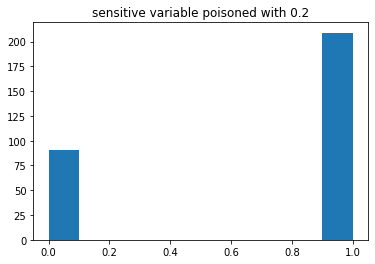

accuary :  78.0
dispImp :  3.536814154551897
dsipMisclf :  6.865181500685997
dispFPR :  15.169262243049939
dispFNR :  3.0568864582803843
odds :  {-1: 15.169262243049939, 1: 3.0568864582803856}
poisoned ratio:  0.3


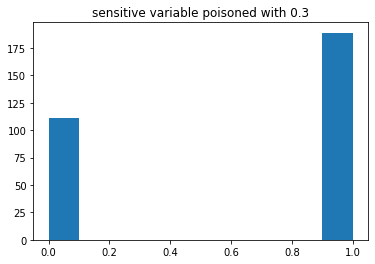

accuary :  78.0
dispImp :  4.55385444902967
dsipMisclf :  5.424263307580324
dispFPR :  14.21577180391445
dispFNR :  2.3852540205845196
odds :  {-1: 14.21577180391445, 1: 2.3852540205845174}


In [19]:

print(len(xs_te))
rep = 10
for rt in [0.0,0.01,0.05,0.1,0.2,0.3]:
    print("="*20)
    print("poisoned ratio: ", rt)
    print("="*20)
    for j in range(rep):
        xs_tep =  poison_Z(xs_te,pos_rt =rt, rs = 4*j+1)
        res = test_FLR_avg_diff(X_te, y_te,xs_tep,load_path = '../results/german_FLR_model.sm')
        if j==0:
            res_sum = res
        else:
            res_sum = add_res(res, res_sum)
    res_sum = divide_res(res_sum,rep)
    plt.figure()
    plt.title('sensitive variable poisoned with '+str(rt))
    plt.hist(xs_tep.flatten())
    plt.show()
    print_res(res_sum)
#     test_FLR(X_te,y_te,xs_tep,load_path = '../results/german_FLR_model.sm')

300
poisoned ratio:  0.0


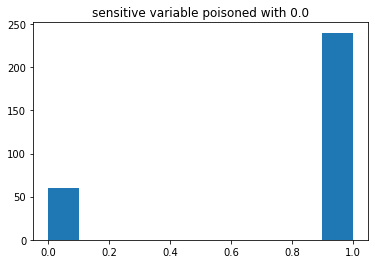

accuary :  78.0
dispImp :  93.0
dsipMisclf :  57.500000000000014
dispFPR :  63.468013468013474
dispFNR :  60.207612456747405
odds :  {-1: 63.468013468013474, 1: 95.86925287356323}
poisoned ratio:  0.01


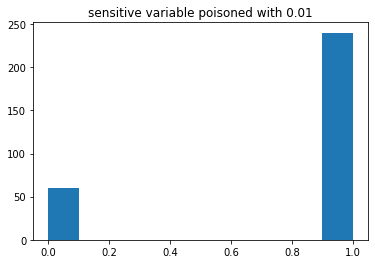

accuary :  78.0
dispImp :  93.89513680884946
dsipMisclf :  58.10632714055855
dispFPR :  64.63727323100734
dispFNR :  67.71904349975284
odds :  {-1: 64.63727323100734, 1: 96.64123750534921}
poisoned ratio:  0.05


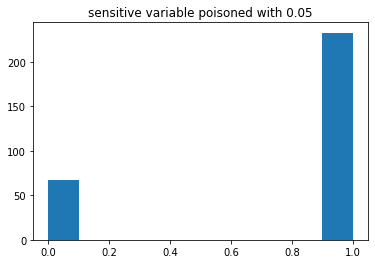

accuary :  78.0
dispImp :  94.57717884126964
dsipMisclf :  61.36647107065323
dispFPR :  66.62297659928285
dispFNR :  69.16434474546773
odds :  {-1: 66.62297659928285, 1: 96.71196850570932}
poisoned ratio:  0.1


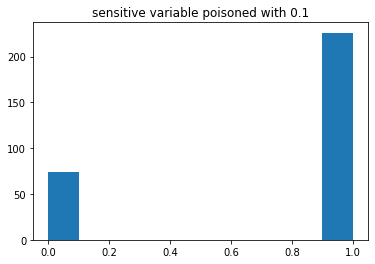

accuary :  78.0
dispImp :  95.01935353133686
dsipMisclf :  66.22450593987173
dispFPR :  69.80694122480982
dispFNR :  73.16771046583985
odds :  {-1: 69.80694122480982, 1: 97.0917534925545}
poisoned ratio:  0.2


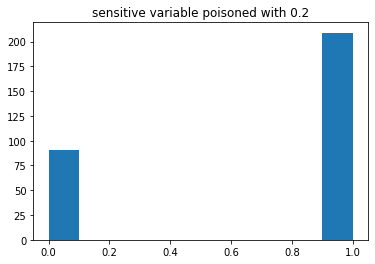

accuary :  78.0
dispImp :  95.67858030305015
dsipMisclf :  75.20839105370274
dispFPR :  75.14567108825756
dispFNR :  70.31825094883592
odds :  {-1: 75.14567108825756, 1: 96.73374046766666}
poisoned ratio:  0.3


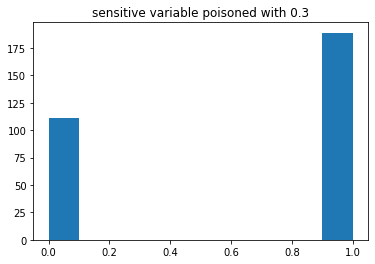

accuary :  78.0
dispImp :  94.44875506169774
dsipMisclf :  79.3617601451753
dispFPR :  76.76316998212256
dispFNR :  77.48537991660197
odds :  {-1: 76.76316998212256, 1: 97.44660449673367}


In [20]:
print(len(xs_te))
rep = 10
for rt in [0.0,0.01,0.05,0.1,0.2,0.3]:
    print("="*20)
    print("poisoned ratio: ", rt)
    print("="*20)
    for j in range(rep):
        xs_tep =  poison_Z(xs_te,pos_rt =rt, rs = 4*j+1)
        res = test_FLR_avg(X_te, y_te,xs_tep,load_path = '../results/german_FLR_model.sm')
        if j==0:
            res_sum = res
        else:
            res_sum = add_res(res, res_sum)
    res_sum = divide_res(res_sum,rep)
    plt.figure()
    plt.title('sensitive variable poisoned with '+str(rt))
    plt.hist(xs_tep.flatten())
    plt.show()
    print_res(res_sum)
#     test_FLR(X_te,y_te,xs_tep,load_path = '../results/german_FLR_model.sm')

In [21]:
accuary :  0.7800000000000008
dispImp :  95.85313706114012
dsipMisclf :  81.05185286535512
dispFPR :  84.47226480793788
dispFNR :  69.86858984534416
odds :  {-1: 84.47226480793788, 1: 96.4281597958115}

In [22]:
print_res(res)

accuary :  78.0
dispImp :  88.72002701789935
dsipMisclf :  70.47619047619047
dispFPR :  58.84502923976608
dispFNR :  80.16194331983806
odds :  {-1: 58.84502923976608, 1: 97.87878787878788}


# LR training and test

In [23]:
from sklearn import linear_model as lm

In [24]:
clf2 = lm.LogisticRegression()
clf2.fit(X_tr,y_tr)

LogisticRegression()

In [25]:
def test_LR_avg(clf,X_te, y_te,xs_te):
    pred = clf.predict(X_te)
    pred = pred.flatten()
    y_te = y_te.flatten()
    xs_te = xs_te.flatten()
    res = {}
    res['accuary'] = calculate_overall_accuracy(pred,y_te,True)
    res['dispImp'] = calculate_impact(pred,y_te,xs_te)
    res['dsipMisclf'] = calculate_misclassification(pred,y_te,xs_te)
    res['dispFPR'] = calculate_mistreatment(pred,y_te,xs_te,cond=-1)
    res['dispFNR'] = calculate_mistreatment(pred,y_te,xs_te,cond=1)
    res['odds'] = calculate_odds_clf(pred,y_te,xs_te,return_val = True)
    return res

In [26]:
def test_LR(clf,X_te, y_te,xs_te):
    pred = clf.predict(X_te)
    calculate_overall_accuracy(pred,y_te)
    calculate_prule_clf(pred,y_te,xs_te)
    calculate_odds_clf(pred,y_te,xs_te)

300
poisoned ratio:  0.0


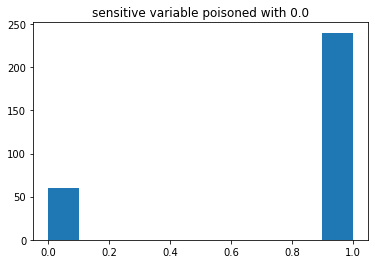

accuary :  79.33333333333334
dispImp :  100.0
dsipMisclf :  61.1111111111111
dispFPR :  70.9090909090909
dispFNR :  90.3114186851211
odds :  {-1: 70.9090909090909, 1: 98.96180941787169}
poisoned ratio:  0.01


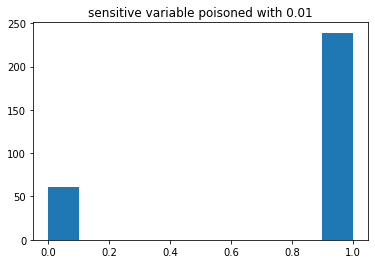

accuary :  79.33333333333334
dispImp :  98.68673013880905
dsipMisclf :  61.092829588747065
dispFPR :  70.97266171328673
dispFNR :  84.42362007933578
odds :  {-1: 70.97266171328673, 1: 98.15732955049056}
poisoned ratio:  0.05


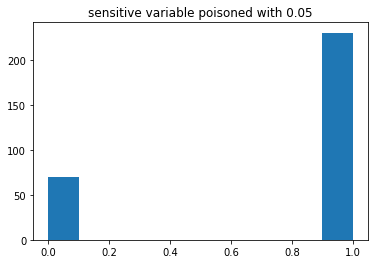

accuary :  79.33333333333334
dispImp :  97.14357061235046
dsipMisclf :  63.32398679764884
dispFPR :  73.52100908789713
dispFNR :  81.43476593412815
odds :  {-1: 73.52100908789713, 1: 97.8684850651337}
poisoned ratio:  0.1


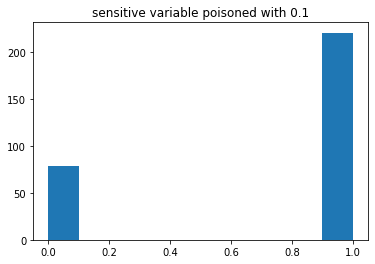

accuary :  79.33333333333334
dispImp :  96.88633378987711
dsipMisclf :  65.61858220462713
dispFPR :  76.4636283517336
dispFNR :  78.93756089554356
odds :  {-1: 76.4636283517336, 1: 97.40664592513954}
poisoned ratio:  0.2


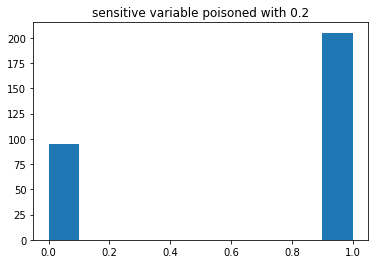

accuary :  79.33333333333334
dispImp :  96.0481916580798
dsipMisclf :  72.82051083554128
dispFPR :  77.39219914584172
dispFNR :  75.69289009062722
odds :  {-1: 77.39219914584172, 1: 97.08076716105518}
poisoned ratio:  0.3


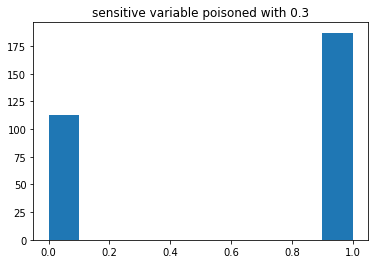

accuary :  79.33333333333334
dispImp :  95.46456927954924
dsipMisclf :  80.53648545038456
dispFPR :  83.48981563840402
dispFNR :  77.9124408894175
odds :  {-1: 83.48981563840402, 1: 97.3518974529618}


In [27]:
print(len(xs_te))
rep = 10
for rt in [0.0,0.01,0.05,0.1,0.2,0.3]:
    print("="*20)
    print("poisoned ratio: ", rt)
    print("="*20)
    for j in range(rep):
        xs_tep =  poison_Z(xs_te,pos_rt =rt, rs = 3*j)
        res = test_LR_avg(clf2,X_te, y_te,xs_tep)
        if j==0:
            res_sum = res
        else:
            res_sum = add_res(res, res_sum)
    res_sum = divide_res(res_sum,rep)
    plt.figure()
    plt.title('sensitive variable poisoned with '+str(rt))
    plt.hist(xs_tep.flatten())
    plt.show()
    print_res(res_sum)
#     test_FLR(X_te,y_te,xs_tep,load_path = '../results/german_FLR_model.sm')

300
poisoned ratio:  0.0


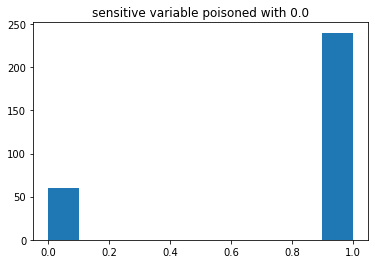

Overall accuracy: 0.7933333333333333
disparate impact:  100.0
disparate misclassification rate:  61.11111111111111
disparate false positive rate: 70.90909090909092
disparate false negative rate: 90.3114186851211
equalized opportunity for -1 : 70.90909090909092
equalized opportunity for 1 : 98.9618094178717
poisoned ratio:  0.01


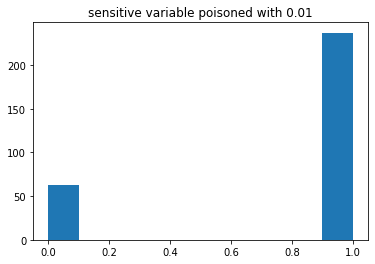

Overall accuracy: 0.7933333333333333
disparate impact:  99.21507064364208
disparate misclassification rate:  64.9789029535865
disparate false positive rate: 74.76923076923076
disparate false negative rate: 84.31372549019608
equalized opportunity for -1 : 74.76923076923076
equalized opportunity for 1 : 98.30866807610995
poisoned ratio:  0.05


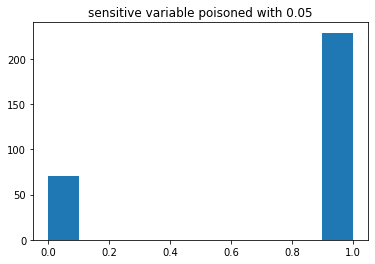

Overall accuracy: 0.7933333333333333
disparate impact:  98.9596670934699
disparate misclassification rate:  60.53233520482429
disparate false positive rate: 71.15749525616698
disparate false negative rate: 98.20359281437126
equalized opportunity for -1 : 71.15749525616698
equalized opportunity for 1 : 99.80617024713293
poisoned ratio:  0.1


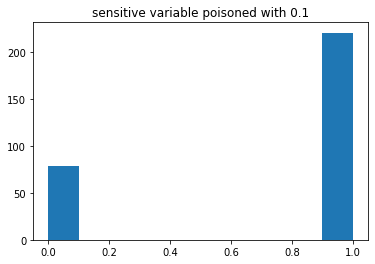

Overall accuracy: 0.7933333333333333
disparate impact:  92.17092266042292
disparate misclassification rate:  60.61381074168798
disparate false positive rate: 82.25324027916251
disparate false negative rate: 66.2551440329218
equalized opportunity for -1 : 82.25324027916251
equalized opportunity for 1 : 95.18213866039953
poisoned ratio:  0.2


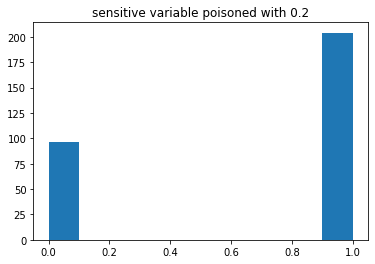

Overall accuracy: 0.7933333333333333
disparate impact:  96.83544303797468
disparate misclassification rate:  65.15837104072399
disparate false positive rate: 77.81954887218045
disparate false negative rate: 75.2895752895753
equalized opportunity for -1 : 77.81954887218045
equalized opportunity for 1 : 96.8395061728395
poisoned ratio:  0.3


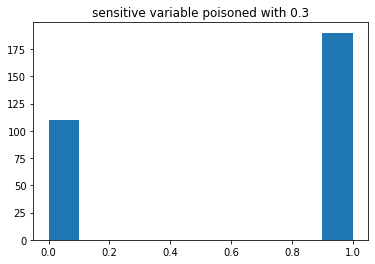

Overall accuracy: 0.7933333333333333
disparate impact:  99.37733499377336
disparate misclassification rate:  70.30075187969925
disparate false positive rate: 76.92307692307692
disparate false negative rate: 94.20289855072464
equalized opportunity for -1 : 76.92307692307692
equalized opportunity for 1 : 99.36


In [28]:
print(len(xs_te))
for rt in [0.0,0.01,0.05,0.1,0.2,0.3]:
    print("="*20)
    print("poisoned ratio: ", rt)
    print("="*20)
    xs_tep =  poison_Z(xs_te,pos_rt =rt, rs = 3)
    plt.figure()
    plt.title('sensitive variable poisoned with '+str(rt))
    plt.hist(xs_tep.flatten())
    plt.show()

    test_LR(clf2,X_te,y_te,xs_tep)

In [29]:
bank = pd.read_csv('../data/bank-full.csv')

In [30]:
print(bank)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pd